# COVID-19 Auswertung - new cases, deaths, Intensivstationen
## DIVI und WHO Daten - Deutschland und einige Nachbarn


## import libraries

In [2]:
import pandas as pd #Daten
from matplotlib import pyplot as plt # plots
import numpy as np

# performance
from datetime import datetime
from datetime import date # todays date
import seaborn as sns

import os
now = datetime.now()

# Preprocessing Dataframes

## Datenimport

In [3]:
# Webabruf - CSV einlesen
data = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")

# Lokal - CSV einlesen
df_divi2 = pd.read_csv("D:\Github\Covid-19-Auswertung-WHO-DIVI\data-k3LbD.csv")
df_divi2['date'] = pd.to_datetime(df_divi2.date, utc=True)
#df_divi2 = df.loc[df.date >= ts, :]

### preprocessing

In [4]:
#gleitender Mittelwert der cases und deaths, 7 Tage
data['MA'] = data['New_cases'].rolling(window=7,min_periods=1).mean()
data['MA_deaths'] = data['New_deaths'].rolling(window=7, min_periods=1).mean()

data['MSTD_cases'] = data['New_cases'].rolling(window=7,min_periods=1).std()
data['MSTD_deaths'] = data['New_deaths'].rolling(window=7,min_periods=1).std()

data['OTG_cases'] = data['MA'] + data['MSTD_cases']
data['UTG_cases'] = data['MA'] - data['MSTD_cases']

data['OTG_deaths'] = data['MA_deaths'] + data['MSTD_deaths']
data['UTG_deaths'] = data['MA_deaths'] - data['MSTD_deaths']

# Date_reported in eine Datumsspalte umwandeln
data['Date_reported'] = pd.to_datetime(data.Date_reported, utc=True)

# df['date'] = pd.to_datetime(df.date, utc=True)

#Timestamp definieren  YYYY-MM-DD
ts = pd.to_datetime('2020-10-01', utc=True)

#dataframe reduzieren 
data = data.loc[data.Date_reported >= ts, :]
# df = df.loc[df.date >= ts, :]

### Länder definieren

In [5]:
ger = data[data.Country == 'Germany']
fr = data[data.Country == 'France']
at = data[data.Country == 'Austria']
pl = data[data.Country == 'Poland']
cz = data[data.Country == 'Czechia']
ch = data[data.Country == 'Switzerland']
it = data[data.Country == 'Italy']
es = data[data.Country == 'Spain']
gb = data[data.Country == 'The United Kingdom']
se = data[data.Country == 'Sweden']
usa = data[data.Country == 'United States of America']

#euro = data[data.WHO_region == 'EURO']

# Variablen für die Plots definieren

### Linien und Schriftgrößen

In [6]:
# Linien Stärke
lws = 3
lwb = 7
# Bezugsschriftgröße
size = 28

### Einwohnerzahlen

In [7]:
E_fr = 66012908
E_pl = 38659927
E_ger = 81504947
E_cz = 10586651
E_at = 8902600
E_ch = 8847020
E_gb = 66650000

 ### Bezugsgröße Einwohner und Datum

In [8]:
pE = 100000

# Heutiges Datum und formatieren dd.mm.YYYY
today = date.today().strftime("%d.%m.%Y")

### Speicherorte und Dateinamen

In [9]:
pfad = "D:\Github\Covid-19-Auswertung-WHO-DIVI\plots_Führungskreis"

name_1_1 = "\plot_1-1_cases_absolute numbers.jpg" # cases absoulte zahlen EU
name_1_2 = "\plot_1-2_cases.jpg" # cases pro 100.000 Einwohner EU 
name_2 = "\plot_2_intensiv.jpg" # intensiv Deutschland
name_2_2 = "\plot_2_2_intensiv2.jpg" # intensiv Deutschland
name_3_1 = "\plot_3-1_deaths_absolute numbers.jpg" # deaths absolute zahlen EU
name_3_2 = "\plot_3-2_deaths.jpg" # deaths pro 100.000 Einwohner EU
name_4_1 = "\plot_4-1_cases_ger.jpg" # cases Deutschland
name_4_2 = "\plot_4-2_deaths_ger.jpg" # deaths Deutschland
name_5 = "D:\Github\Covid-19-Auswertung-WHO-DIVI\performance_dist_Führungskreis.jpg" # Performance Plot

# Visualisierung der Plots

###  4-1) Cases 7 Tage Mittelwert Deutschland

Text(0.5, 0, 'Zeit')

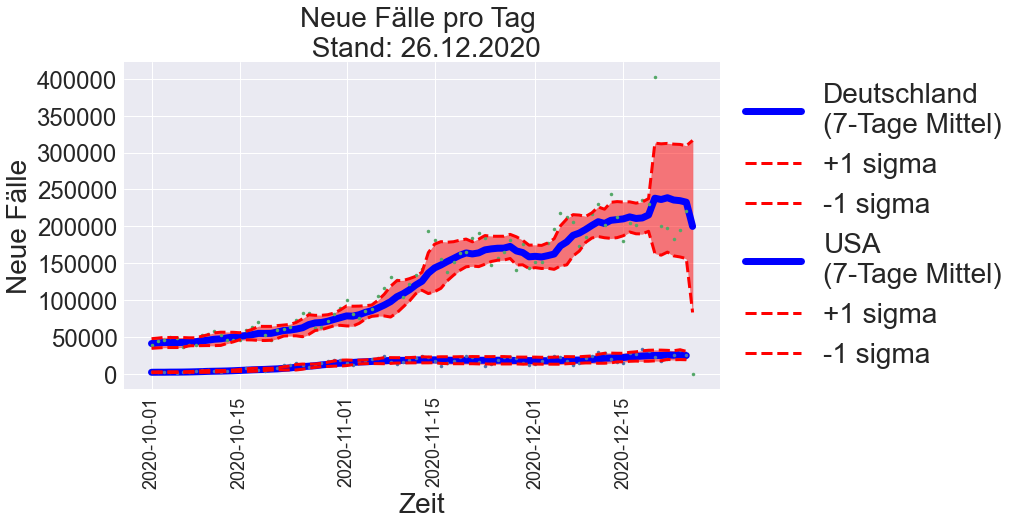

In [23]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(16/1.5,9/1.5))

# Neue Fälle pro Tag
plt.plot(ger.Date_reported,ger['MA'], 'b-', linewidth = lwb, label = "Deutschland\n(7-Tage Mittel)")
plt.plot(ger.Date_reported,ger['New_cases'], '.')
plt.plot(ger.Date_reported,ger['OTG_cases'], 'r--', linewidth = lws, label ="+1 sigma")
plt.plot(ger.Date_reported,ger['UTG_cases'], 'r--', linewidth = lws, label ="-1 sigma")

# fill area between lines
plt.fill_between(ger.Date_reported, ger['OTG_cases'], ger['UTG_cases'] , color='red',alpha=0.5)




# Neue Fälle pro Tag
plt.plot(usa.Date_reported,usa['MA'], 'b-', linewidth = lwb, label = "USA\n(7-Tage Mittel)")
plt.plot(usa.Date_reported,usa['New_cases'], '.')
plt.plot(usa.Date_reported,usa['OTG_cases'], 'r--', linewidth = lws, label ="+1 sigma")
plt.plot(usa.Date_reported,usa['UTG_cases'], 'r--', linewidth = lws, label ="-1 sigma")

# fill area between lines
plt.fill_between(usa.Date_reported, usa['OTG_cases'], usa['UTG_cases'] , color='red',alpha=0.5)




plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5),
           fancybox=True, 
           shadow=True, 
           ncol=1, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation = 90)
plt.yticks(fontsize=size -4)

plt.ylabel('Neue Fälle', fontsize=size)
plt.title('Neue Fälle pro Tag \n Stand: ' + today, fontsize=size)
plt.xlabel('Zeit', fontsize=size)



# Diagramm als Bild exporieren und Auflösung definieren
#plt.savefig(pfad + name_4_1, dpi = 150, bbox_inches='tight')
#plt.close()

###  4-2) Deaths 7 Tage Mittelwert Deutschland

Text(0.5, 0, 'Zeit')

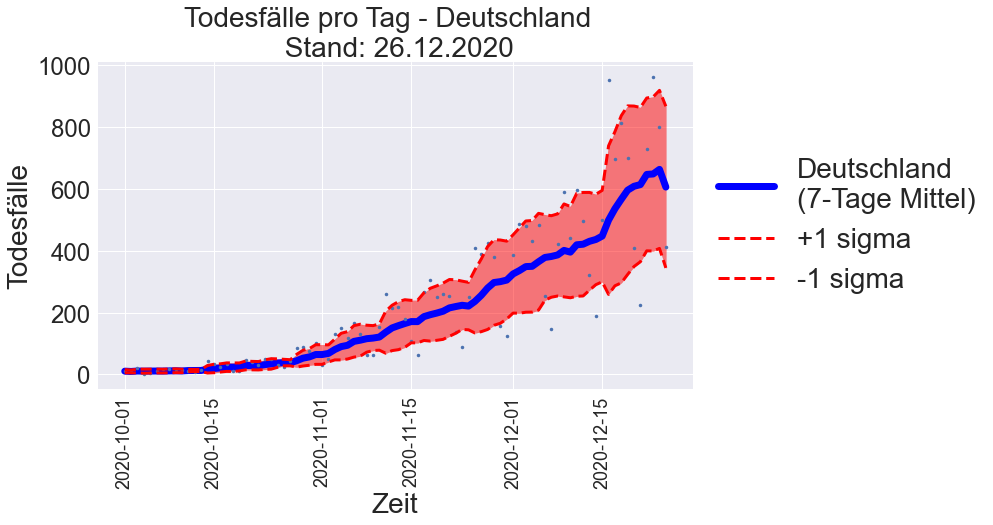

In [22]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(16/1.5,9/1.5))

plt.style.use('seaborn')
plt.grid(True)

# Todesfälle
plt.plot(ger.Date_reported,ger['MA_deaths'], 'b-', linewidth = lwb, label = "Deutschland\n(7-Tage Mittel)") # blau, linie, dick
plt.plot(ger.Date_reported,ger['New_deaths'], '.')

plt.plot(ger.Date_reported,ger['OTG_deaths'], 'r--', linewidth = lws, label ="+1 sigma")
plt.plot(ger.Date_reported,ger['UTG_deaths'], 'r--', linewidth = lws, label ="-1 sigma")

# fill area between lines
plt.fill_between(ger.Date_reported, ger['OTG_deaths'], ger['UTG_deaths'] , color='red',alpha=0.5)



# Legende 
plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5),
           fancybox=True, 
           shadow=True, 
           ncol=1, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation = 90)
plt.yticks(fontsize=size -4)
plt.ylabel('Todesfälle', fontsize=size)
plt.title('Todesfälle pro Tag - Deutschland  \n Stand: ' + today, fontsize=size)
plt.xlabel('Zeit', fontsize=size)



# Diagramm als Bild exporieren und Auflösung definieren
#plt.savefig(pfad + name_4_2, dpi = 150, bbox_inches='tight')
#plt.close()